# **IMPORTING DEPENDENCIES**

In [298]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from sklearn.preprocessing import StandardScaler

In [299]:
df = pd.read_csv("/content/HealthcareProviders.csv")

In [300]:
df_org = df

# **BASIC EXPLORATION OF THE DATASET**

In [301]:
df.describe(include='all')

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
count,1.000000e+05,1.000000e+05,100000,95745,70669,92791,95746,100000,100000,40637,...,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,NaN,NaN,42820,13022,29,1854,2,2,51928,10024,...,2631,2455,2,2748,1274,1979,49629,38088,83367,76237
top,NaN,NaN,PATEL,MICHAEL,A,MD,M,I,200 1ST ST SW,SUITE 200,...,99213,Established patient office or other outpatient...,N,13,11,12,3,150,2.94,25.32
freq,NaN,NaN,557,2350,8152,32874,66641,95746,244,1624,...,4578,4578,93802,3018,4791,3210,1017,970,623,1630
mean,4.907646e+06,1.498227e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.839633e+06,2.874125e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.090000e+02,1.003001e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.458791e+06,1.245669e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.901266e+06,1.497847e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.349450e+06,1.740374e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


** ADDING A NEW COLUMN "MONEY DIFFERENCE" IN THE DATASET WHICH CALCULATES THE DIFFERENCE BETWEEN "AVERAGE SUBMITTED CHARGE AMOUNT" COLUMN AND THE "AVERAGE MEDICARE PAYMENT AMOUNT" COLUMN**

In [302]:
df["Average Submitted Charge Amount"] = df["Average Submitted Charge Amount"].replace(',', '', regex=True)

In [303]:
df["Average Medicare Payment Amount"] = df["Average Medicare Payment Amount"].replace(',', '', regex=True)

In [304]:
df["Money difference"] = df["Average Submitted Charge Amount"].astype(float) - df["Average Medicare Payment Amount"].astype(float)

# **Basic exploration of the dataset with the new column**

In [305]:
df.nunique()

index                                                       100000
National Provider Identifier                                 89508
Last Name/Organization Name of the Provider                  42820
First Name of the Provider                                   13022
Middle Initial of the Provider                                  29
Credentials of the Provider                                   1854
Gender of the Provider                                           2
Entity Type of the Provider                                      2
Street Address 1 of the Provider                             51928
Street Address 2 of the Provider                             10024
City of the Provider                                          5846
Zip Code of the Provider                                     47827
State Code of the Provider                                      58
Country Code of the Provider                                     4
Provider Type                                                 

In [306]:
(df.isnull().sum()/(len(df)))*100

index                                                        0.000
National Provider Identifier                                 0.000
Last Name/Organization Name of the Provider                  0.000
First Name of the Provider                                   4.255
Middle Initial of the Provider                              29.331
Credentials of the Provider                                  7.209
Gender of the Provider                                       4.254
Entity Type of the Provider                                  0.000
Street Address 1 of the Provider                             0.000
Street Address 2 of the Provider                            59.363
City of the Provider                                         0.000
Zip Code of the Provider                                     0.000
State Code of the Provider                                   0.000
Country Code of the Provider                                 0.000
Provider Type                                                0

In [307]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,100000.0,NaN,NaN,NaN,4907645.74603,2839632.695465,209.0,2458790.75,4901266.0,7349450.5,9847440.0
National Provider Identifier,100000.0,NaN,NaN,NaN,1498226858.04662,287412506.095332,1003001298.0,1245669407.25,1497846612.0,1740373949.25,1992999874.0
Last Name/Organization Name of the Provider,100000,42820,PATEL,557,NaN,NaN,NaN,NaN,NaN,NaN,NaN
First Name of the Provider,95745,13022,MICHAEL,2350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Middle Initial of the Provider,70669,29,A,8152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credentials of the Provider,92791,1854,MD,32874,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender of the Provider,95746,2,M,66641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Entity Type of the Provider,100000,2,I,95746,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Street Address 1 of the Provider,100000,51928,200 1ST ST SW,244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Street Address 2 of the Provider,40637,10024,SUITE 200,1624,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Dropping different irrelevant fields throughout the process**

In [308]:
df = df.drop(columns=['index', 'National Provider Identifier','Street Address 1 of the Provider','Street Address 2 of the Provider','Country Code of the Provider'])

In [309]:
df['Last Name/Organization Name of the Provider'] = df['First Name of the Provider'].astype(str) + " " + df['Last Name/Organization Name of the Provider']

In [310]:
df.head()

,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Provider Type,...,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Money difference
0,SATYASREE UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,SAINT LOUIS,631041004.0,MO,Internal Medicine,...,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889,147.948889
1,WENDY JONES,WENDY,P,M.D.,F,I,FAYETTEVILLE,283043815.0,NC,Obstetrics & Gynecology,...,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714,429.970000
2,RICHARD DUROCHER,RICHARD,W,DPM,M,I,NORTH HAVEN,64732343.0,CT,Podiatry,...,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375,90.560312
3,JASPER FULLARD,JASPER,NaN,MD,M,I,KANSAS CITY,641183998.0,MO,Internal Medicine,...,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43,1.570000
4,ANTHONY PERROTTI,ANTHONY,E,DO,M,I,JUPITER,334585700.0,FL,Internal Medicine,...,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758,20.460606


In [311]:
df=df.drop(columns=['First Name of the Provider'])

In [312]:
df.head()

,Last Name/Organization Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Provider Type,Medicare Participation Indicator,...,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Money difference
0,SATYASREE UPADHYAYULA,NaN,M.D.,F,I,SAINT LOUIS,631041004.0,MO,Internal Medicine,Y,...,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889,147.948889
1,WENDY JONES,P,M.D.,F,I,FAYETTEVILLE,283043815.0,NC,Obstetrics & Gynecology,Y,...,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714,429.970000
2,RICHARD DUROCHER,W,DPM,M,I,NORTH HAVEN,64732343.0,CT,Podiatry,Y,...,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375,90.560312
3,JASPER FULLARD,NaN,MD,M,I,KANSAS CITY,641183998.0,MO,Internal Medicine,Y,...,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43,1.570000
4,ANTHONY PERROTTI,E,DO,M,I,JUPITER,334585700.0,FL,Internal Medicine,Y,...,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758,20.460606


In [313]:
df.rename(columns = {'Last Name/Organization Name of the Provider':'Full name'}, inplace = True)

In [314]:
df.head()

,Full name,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Provider Type,Medicare Participation Indicator,...,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Money difference
0,SATYASREE UPADHYAYULA,NaN,M.D.,F,I,SAINT LOUIS,631041004.0,MO,Internal Medicine,Y,...,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889,147.948889
1,WENDY JONES,P,M.D.,F,I,FAYETTEVILLE,283043815.0,NC,Obstetrics & Gynecology,Y,...,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714,429.970000
2,RICHARD DUROCHER,W,DPM,M,I,NORTH HAVEN,64732343.0,CT,Podiatry,Y,...,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375,90.560312
3,JASPER FULLARD,NaN,MD,M,I,KANSAS CITY,641183998.0,MO,Internal Medicine,Y,...,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43,1.570000
4,ANTHONY PERROTTI,E,DO,M,I,JUPITER,334585700.0,FL,Internal Medicine,Y,...,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758,20.460606


In [315]:
df=df.drop(columns=['HCPCS Description'])

In [316]:
df.head()

,Full name,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Provider Type,Medicare Participation Indicator,...,HCPCS Code,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Money difference
0,SATYASREE UPADHYAYULA,NaN,M.D.,F,I,SAINT LOUIS,631041004.0,MO,Internal Medicine,Y,...,99223,N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889,147.948889
1,WENDY JONES,P,M.D.,F,I,FAYETTEVILLE,283043815.0,NC,Obstetrics & Gynecology,Y,...,G0202,N,175,175,175,123.73,548.8,118.83,135.31525714,429.970000
2,RICHARD DUROCHER,W,DPM,M,I,NORTH HAVEN,64732343.0,CT,Podiatry,Y,...,99348,N,32,13,32,90.65,155,64.4396875,60.5959375,90.560312
3,JASPER FULLARD,NaN,MD,M,I,KANSAS CITY,641183998.0,MO,Internal Medicine,Y,...,81002,N,20,18,20,3.5,5,3.43,3.43,1.570000
4,ANTHONY PERROTTI,E,DO,M,I,JUPITER,334585700.0,FL,Internal Medicine,Y,...,96372,N,33,24,31,26.52,40,19.539393939,19.057575758,20.460606


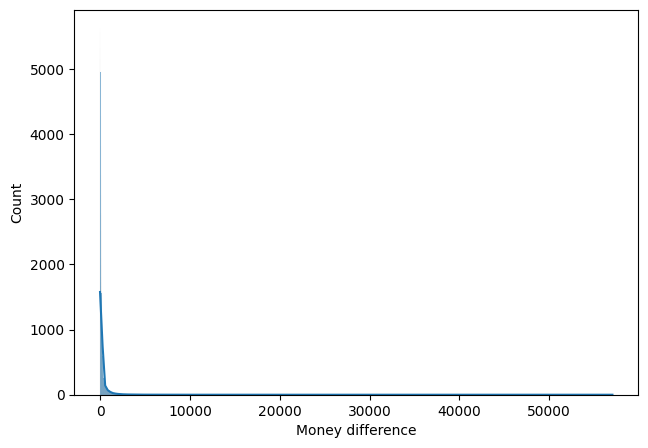

In [317]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['Money difference'], kde=True)

plt.show()

### Scaling the numerical fields using the formula of standard scaler

In [318]:
scaler = StandardScaler()

In [319]:
df['Money difference'] = scaler.fit_transform(df[['Money difference']])

display(df)

,Full name,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Provider Type,Medicare Participation Indicator,...,HCPCS Code,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Money difference
0,SATYASREE UPADHYAYULA,NaN,M.D.,F,I,SAINT LOUIS,631041004.0,MO,Internal Medicine,Y,...,99223,N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889,-0.139738
1,WENDY JONES,P,M.D.,F,I,FAYETTEVILLE,283043815.0,NC,Obstetrics & Gynecology,Y,...,G0202,N,175,175,175,123.73,548.8,118.83,135.31525714,0.165185
2,RICHARD DUROCHER,W,DPM,M,I,NORTH HAVEN,64732343.0,CT,Podiatry,Y,...,99348,N,32,13,32,90.65,155,64.4396875,60.5959375,-0.201787
3,JASPER FULLARD,NaN,MD,M,I,KANSAS CITY,641183998.0,MO,Internal Medicine,Y,...,81002,N,20,18,20,3.5,5,3.43,3.43,-0.298004
4,ANTHONY PERROTTI,E,DO,M,I,JUPITER,334585700.0,FL,Internal Medicine,Y,...,96372,N,33,24,31,26.52,40,19.539393939,19.057575758,-0.277579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,JOAN PAPES,NaN,PT,F,I,WILMINGTON,604811236.0,IL,Physical Therapist in Private Practice,Y,...,97162,N,20,20,20,85.3725,214,60.7255,62.2485,-0.133980
99996,MARGARET HAYNER,S,ARNP,F,I,REDMOND,977561502.0,OR,Nurse Practitioner,Y,...,99213,N,136,107,136,61.27,144.05147059,30.006176471,37.040220588,-0.176395
99997,DANA VALENCIA,NaN,M.D.,M,I,SAINT LOUIS,631312322.0,MO,Cardiology,Y,...,93320,N,11,11,11,17.98,109.54545455,14.09,14.62,-0.196494
99998,RAFAELA GONZALEZ-LAMOS,NaN,NaN,F,I,LARCHMONT,105383500.0,NY,Internal Medicine,Y,...,G0008,N,12,12,12,30.54,65,29.93,25.32,-0.261783


In [320]:
df['Average Medicare Payment Amount'] = scaler.fit_transform(df[['Average Medicare Payment Amount']])

display(df)

,Full name,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Provider Type,Medicare Participation Indicator,...,HCPCS Code,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Money difference
0,SATYASREE UPADHYAYULA,NaN,M.D.,F,I,SAINT LOUIS,631041004.0,MO,Internal Medicine,Y,...,99223,N,27,24,27,200.58777778,305.21111111,0.400082,160.90888889,-0.139738
1,WENDY JONES,P,M.D.,F,I,FAYETTEVILLE,283043815.0,NC,Obstetrics & Gynecology,Y,...,G0202,N,175,175,175,123.73,548.8,0.207649,135.31525714,0.165185
2,RICHARD DUROCHER,W,DPM,M,I,NORTH HAVEN,64732343.0,CT,Podiatry,Y,...,99348,N,32,13,32,90.65,155,-0.064687,60.5959375,-0.201787
3,JASPER FULLARD,NaN,MD,M,I,KANSAS CITY,641183998.0,MO,Internal Medicine,Y,...,81002,N,20,18,20,3.5,5,-0.370166,3.43,-0.298004
4,ANTHONY PERROTTI,E,DO,M,I,JUPITER,334585700.0,FL,Internal Medicine,Y,...,96372,N,33,24,31,26.52,40,-0.289505,19.057575758,-0.277579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,JOAN PAPES,NaN,PT,F,I,WILMINGTON,604811236.0,IL,Physical Therapist in Private Practice,Y,...,97162,N,20,20,20,85.3725,214,-0.083284,62.2485,-0.133980
99996,MARGARET HAYNER,S,ARNP,F,I,REDMOND,977561502.0,OR,Nurse Practitioner,Y,...,99213,N,136,107,136,61.27,144.05147059,-0.237098,37.040220588,-0.176395
99997,DANA VALENCIA,NaN,M.D.,M,I,SAINT LOUIS,631312322.0,MO,Cardiology,Y,...,93320,N,11,11,11,17.98,109.54545455,-0.316791,14.62,-0.196494
99998,RAFAELA GONZALEZ-LAMOS,NaN,NaN,F,I,LARCHMONT,105383500.0,NY,Internal Medicine,Y,...,G0008,N,12,12,12,30.54,65,-0.237479,25.32,-0.261783


In [321]:
df['Average Submitted Charge Amount'] = scaler.fit_transform(df[['Average Submitted Charge Amount']])

display(df)

,Full name,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Provider Type,Medicare Participation Indicator,...,HCPCS Code,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Money difference
0,SATYASREE UPADHYAYULA,NaN,M.D.,F,I,SAINT LOUIS,631041004.0,MO,Internal Medicine,Y,...,99223,N,27,24,27,200.58777778,-0.046433,0.400082,160.90888889,-0.139738
1,WENDY JONES,P,M.D.,F,I,FAYETTEVILLE,283043815.0,NC,Obstetrics & Gynecology,Y,...,G0202,N,175,175,175,123.73,0.182805,0.207649,135.31525714,0.165185
2,RICHARD DUROCHER,W,DPM,M,I,NORTH HAVEN,64732343.0,CT,Podiatry,Y,...,99348,N,32,13,32,90.65,-0.187794,-0.064687,60.5959375,-0.201787
3,JASPER FULLARD,NaN,MD,M,I,KANSAS CITY,641183998.0,MO,Internal Medicine,Y,...,81002,N,20,18,20,3.5,-0.328957,-0.370166,3.43,-0.298004
4,ANTHONY PERROTTI,E,DO,M,I,JUPITER,334585700.0,FL,Internal Medicine,Y,...,96372,N,33,24,31,26.52,-0.296019,-0.289505,19.057575758,-0.277579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,JOAN PAPES,NaN,PT,F,I,WILMINGTON,604811236.0,IL,Physical Therapist in Private Practice,Y,...,97162,N,20,20,20,85.3725,-0.132270,-0.083284,62.2485,-0.133980
99996,MARGARET HAYNER,S,ARNP,F,I,REDMOND,977561502.0,OR,Nurse Practitioner,Y,...,99213,N,136,107,136,61.27,-0.198097,-0.237098,37.040220588,-0.176395
99997,DANA VALENCIA,NaN,M.D.,M,I,SAINT LOUIS,631312322.0,MO,Cardiology,Y,...,93320,N,11,11,11,17.98,-0.230571,-0.316791,14.62,-0.196494
99998,RAFAELA GONZALEZ-LAMOS,NaN,NaN,F,I,LARCHMONT,105383500.0,NY,Internal Medicine,Y,...,G0008,N,12,12,12,30.54,-0.272492,-0.237479,25.32,-0.261783


In [322]:
df.head()

,Full name,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Provider Type,Medicare Participation Indicator,...,HCPCS Code,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Money difference
0,SATYASREE UPADHYAYULA,NaN,M.D.,F,I,SAINT LOUIS,631041004.0,MO,Internal Medicine,Y,...,99223,N,27,24,27,200.58777778,-0.046433,0.400082,160.90888889,-0.139738
1,WENDY JONES,P,M.D.,F,I,FAYETTEVILLE,283043815.0,NC,Obstetrics & Gynecology,Y,...,G0202,N,175,175,175,123.73,0.182805,0.207649,135.31525714,0.165185
2,RICHARD DUROCHER,W,DPM,M,I,NORTH HAVEN,64732343.0,CT,Podiatry,Y,...,99348,N,32,13,32,90.65,-0.187794,-0.064687,60.5959375,-0.201787
3,JASPER FULLARD,NaN,MD,M,I,KANSAS CITY,641183998.0,MO,Internal Medicine,Y,...,81002,N,20,18,20,3.5,-0.328957,-0.370166,3.43,-0.298004
4,ANTHONY PERROTTI,E,DO,M,I,JUPITER,334585700.0,FL,Internal Medicine,Y,...,96372,N,33,24,31,26.52,-0.296019,-0.289505,19.057575758,-0.277579


In [323]:
df["Average Medicare Allowed Amount"] = df["Average Medicare Allowed Amount"].replace('.', '', regex=True)

In [324]:
df["Number of Services"] = df["Number of Services"].replace(',', '', regex=True)

In [325]:
df["Number of Medicare Beneficiaries"] = df["Number of Medicare Beneficiaries"].replace(',', '', regex=True)

In [326]:
df["Number of Distinct Medicare Beneficiary/Per Day Services"] = df["Number of Distinct Medicare Beneficiary/Per Day Services"].replace(',', '', regex=True)

In [327]:
df.drop(columns=['Average Medicare Allowed Amount','Average Medicare Standardized Amount',], inplace=True)

In [328]:
df.head()

,Full name,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Submitted Charge Amount,Average Medicare Payment Amount,Money difference
0,SATYASREE UPADHYAYULA,NaN,M.D.,F,I,SAINT LOUIS,631041004.0,MO,Internal Medicine,Y,F,99223,N,27,24,27,-0.046433,0.400082,-0.139738
1,WENDY JONES,P,M.D.,F,I,FAYETTEVILLE,283043815.0,NC,Obstetrics & Gynecology,Y,O,G0202,N,175,175,175,0.182805,0.207649,0.165185
2,RICHARD DUROCHER,W,DPM,M,I,NORTH HAVEN,64732343.0,CT,Podiatry,Y,O,99348,N,32,13,32,-0.187794,-0.064687,-0.201787
3,JASPER FULLARD,NaN,MD,M,I,KANSAS CITY,641183998.0,MO,Internal Medicine,Y,O,81002,N,20,18,20,-0.328957,-0.370166,-0.298004
4,ANTHONY PERROTTI,E,DO,M,I,JUPITER,334585700.0,FL,Internal Medicine,Y,O,96372,N,33,24,31,-0.296019,-0.289505,-0.277579


In [329]:
mean = np.mean(df["Money difference"])
std = np.std(df["Money difference"])
print('mean of the dataset is', mean)
print('std. deviation is', std)

mean of the dataset is -3.19211324040225e-17
std. deviation is 0.9999999999999999


In [330]:
threshold = 3
outlier = []
for i in df["Money difference"]:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

outlier in dataset is [5.001480953472853, 7.460672545959053, 5.70618723372476, 5.472844079938339, 5.5955541655733585, 4.102689153875423, 3.125975413181884, 7.71562222857764, 7.4408227836147, 10.440100269481231, 4.9144463476674005, 14.65648528005027, 3.520356080519061, 9.839336685639676, 5.291678258126511, 12.288456819070694, 3.3148067941615165, 6.618849955479128, 5.087215423724219, 4.032193802311867, 6.61781104974683, 6.05097357153305, 5.551040769304619, 4.986930703016156, 31.079025660093187, 3.5079951528708033, 8.144963742937621, 3.6452169325732102, 5.282640091792032, 3.7323507792897472, 3.4044834638271375, 8.132835264219686, 5.934169435970785, 3.3895289080275064, 6.783230562633316, 4.36565587624966, 6.419579009759744, 5.385542319706993, 5.227544784104939, 10.285939937668005, 12.982379682037807, 4.163789831507433, 11.579963469712071, 5.543206894132582, 3.3951877693604637, 6.33314268937909, 3.8314872505974136, 5.379308938119263, 5.982010060303651, 6.12386259998153, 3.032327516620086, 9

### Appending a column called Z-score to the dataset to store the Z-score of each row

In [331]:
df["Z-score"] = (df["Money difference"] - mean)/std

### Making a column called Fraud that represents if we consider the data to be a fraudulent data or not depending on the Z-score. If the Z-score is above 3 then we consider it to be anomalous/fraudulent or if the Z-score is less then we consider it normal.

In [332]:
df['Fraud'] = df['Z-score'].apply(lambda x: 0 if x <= 3 else 1)

In [333]:
df.head()

,Full name,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Provider Type,Medicare Participation Indicator,...,HCPCS Code,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Submitted Charge Amount,Average Medicare Payment Amount,Money difference,Z-score,Fraud
0,SATYASREE UPADHYAYULA,NaN,M.D.,F,I,SAINT LOUIS,631041004.0,MO,Internal Medicine,Y,...,99223,N,27,24,27,-0.046433,0.400082,-0.139738,-0.139738,0
1,WENDY JONES,P,M.D.,F,I,FAYETTEVILLE,283043815.0,NC,Obstetrics & Gynecology,Y,...,G0202,N,175,175,175,0.182805,0.207649,0.165185,0.165185,0
2,RICHARD DUROCHER,W,DPM,M,I,NORTH HAVEN,64732343.0,CT,Podiatry,Y,...,99348,N,32,13,32,-0.187794,-0.064687,-0.201787,-0.201787,0
3,JASPER FULLARD,NaN,MD,M,I,KANSAS CITY,641183998.0,MO,Internal Medicine,Y,...,81002,N,20,18,20,-0.328957,-0.370166,-0.298004,-0.298004,0
4,ANTHONY PERROTTI,E,DO,M,I,JUPITER,334585700.0,FL,Internal Medicine,Y,...,96372,N,33,24,31,-0.296019,-0.289505,-0.277579,-0.277579,0


In [334]:
df['Fraud'].value_counts()

Fraud
0    98933
1     1067
Name: count, dtype: int64

In [335]:
df.nunique()

Full name                                                   84197
Middle Initial of the Provider                                 29
Credentials of the Provider                                  1854
Gender of the Provider                                          2
Entity Type of the Provider                                     2
City of the Provider                                         5846
Zip Code of the Provider                                    47827
State Code of the Provider                                     58
Provider Type                                                  90
Medicare Participation Indicator                                2
Place of Service                                                2
HCPCS Code                                                   2631
HCPCS Drug Indicator                                            2
Number of Services                                           2748
Number of Medicare Beneficiaries                             1274
Number of 

In [336]:
df.drop(columns=['Zip Code of the Provider'], inplace=True)

In [337]:
df.head()

,Full name,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,State Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Submitted Charge Amount,Average Medicare Payment Amount,Money difference,Z-score,Fraud
0,SATYASREE UPADHYAYULA,NaN,M.D.,F,I,SAINT LOUIS,MO,Internal Medicine,Y,F,99223,N,27,24,27,-0.046433,0.400082,-0.139738,-0.139738,0
1,WENDY JONES,P,M.D.,F,I,FAYETTEVILLE,NC,Obstetrics & Gynecology,Y,O,G0202,N,175,175,175,0.182805,0.207649,0.165185,0.165185,0
2,RICHARD DUROCHER,W,DPM,M,I,NORTH HAVEN,CT,Podiatry,Y,O,99348,N,32,13,32,-0.187794,-0.064687,-0.201787,-0.201787,0
3,JASPER FULLARD,NaN,MD,M,I,KANSAS CITY,MO,Internal Medicine,Y,O,81002,N,20,18,20,-0.328957,-0.370166,-0.298004,-0.298004,0
4,ANTHONY PERROTTI,E,DO,M,I,JUPITER,FL,Internal Medicine,Y,O,96372,N,33,24,31,-0.296019,-0.289505,-0.277579,-0.277579,0


### Applying One hot encoding the the columns with few categories

In [338]:
df = pd.get_dummies(df, columns=['Gender of the Provider','Entity Type of the Provider','Place of Service','Medicare Participation Indicator','HCPCS Drug Indicator'], dtype='int')

In [339]:
df.head()

,Full name,Middle Initial of the Provider,Credentials of the Provider,City of the Provider,State Code of the Provider,Provider Type,HCPCS Code,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,...,Gender of the Provider_F,Gender of the Provider_M,Entity Type of the Provider_I,Entity Type of the Provider_O,Place of Service_F,Place of Service_O,Medicare Participation Indicator_N,Medicare Participation Indicator_Y,HCPCS Drug Indicator_N,HCPCS Drug Indicator_Y
0,SATYASREE UPADHYAYULA,NaN,M.D.,SAINT LOUIS,MO,Internal Medicine,99223,27,24,27,...,1,0,1,0,1,0,0,1,1,0
1,WENDY JONES,P,M.D.,FAYETTEVILLE,NC,Obstetrics & Gynecology,G0202,175,175,175,...,1,0,1,0,0,1,0,1,1,0
2,RICHARD DUROCHER,W,DPM,NORTH HAVEN,CT,Podiatry,99348,32,13,32,...,0,1,1,0,0,1,0,1,1,0
3,JASPER FULLARD,NaN,MD,KANSAS CITY,MO,Internal Medicine,81002,20,18,20,...,0,1,1,0,0,1,0,1,1,0
4,ANTHONY PERROTTI,E,DO,JUPITER,FL,Internal Medicine,96372,33,24,31,...,0,1,1,0,0,1,0,1,1,0


In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   Full name                                                 100000 non-null  object 
 1   Middle Initial of the Provider                            70669 non-null   object 
 2   Credentials of the Provider                               92791 non-null   object 
 3   City of the Provider                                      100000 non-null  object 
 4   State Code of the Provider                                100000 non-null  object 
 5   Provider Type                                             100000 non-null  object 
 6   HCPCS Code                                                100000 non-null  object 
 7   Number of Services                                        100000 non-null  object 
 8   Numbe

In [341]:
df.drop(columns=['State Code of the Provider'], inplace=True)

### Applying label encoding the fields with large no. of categories

In [342]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['Provider Type'] = label_encoder.fit_transform(df['Provider Type'])

In [343]:
df_frequencies = df['Provider Type'].value_counts()

df_frequency_map = df_frequencies.to_dict()

df['Provider Type'] = df['Provider Type'].map(df_frequency_map)

In [344]:
df.head()

,Full name,Middle Initial of the Provider,Credentials of the Provider,City of the Provider,Provider Type,HCPCS Code,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Submitted Charge Amount,...,Gender of the Provider_F,Gender of the Provider_M,Entity Type of the Provider_I,Entity Type of the Provider_O,Place of Service_F,Place of Service_O,Medicare Participation Indicator_N,Medicare Participation Indicator_Y,HCPCS Drug Indicator_N,HCPCS Drug Indicator_Y
0,SATYASREE UPADHYAYULA,NaN,M.D.,SAINT LOUIS,11366,99223,27,24,27,-0.046433,...,1,0,1,0,1,0,0,1,1,0
1,WENDY JONES,P,M.D.,FAYETTEVILLE,1028,G0202,175,175,175,0.182805,...,1,0,1,0,0,1,0,1,1,0
2,RICHARD DUROCHER,W,DPM,NORTH HAVEN,2027,99348,32,13,32,-0.187794,...,0,1,1,0,0,1,0,1,1,0
3,JASPER FULLARD,NaN,MD,KANSAS CITY,11366,81002,20,18,20,-0.328957,...,0,1,1,0,0,1,0,1,1,0
4,ANTHONY PERROTTI,E,DO,JUPITER,11366,96372,33,24,31,-0.296019,...,0,1,1,0,0,1,0,1,1,0


In [345]:
df.drop(columns=['City of the Provider'], inplace=True)

In [346]:
df.head()

,Full name,Middle Initial of the Provider,Credentials of the Provider,Provider Type,HCPCS Code,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Submitted Charge Amount,Average Medicare Payment Amount,...,Gender of the Provider_F,Gender of the Provider_M,Entity Type of the Provider_I,Entity Type of the Provider_O,Place of Service_F,Place of Service_O,Medicare Participation Indicator_N,Medicare Participation Indicator_Y,HCPCS Drug Indicator_N,HCPCS Drug Indicator_Y
0,SATYASREE UPADHYAYULA,NaN,M.D.,11366,99223,27,24,27,-0.046433,0.400082,...,1,0,1,0,1,0,0,1,1,0
1,WENDY JONES,P,M.D.,1028,G0202,175,175,175,0.182805,0.207649,...,1,0,1,0,0,1,0,1,1,0
2,RICHARD DUROCHER,W,DPM,2027,99348,32,13,32,-0.187794,-0.064687,...,0,1,1,0,0,1,0,1,1,0
3,JASPER FULLARD,NaN,MD,11366,81002,20,18,20,-0.328957,-0.370166,...,0,1,1,0,0,1,0,1,1,0
4,ANTHONY PERROTTI,E,DO,11366,96372,33,24,31,-0.296019,-0.289505,...,0,1,1,0,0,1,0,1,1,0


In [347]:
df.drop(columns=['Full name','Middle Initial of the Provider','Credentials of the Provider'], inplace=True)

In [348]:
df.head()

,Provider Type,HCPCS Code,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Submitted Charge Amount,Average Medicare Payment Amount,Money difference,Z-score,Fraud,Gender of the Provider_F,Gender of the Provider_M,Entity Type of the Provider_I,Entity Type of the Provider_O,Place of Service_F,Place of Service_O,Medicare Participation Indicator_N,Medicare Participation Indicator_Y,HCPCS Drug Indicator_N,HCPCS Drug Indicator_Y
0,11366,99223,27,24,27,-0.046433,0.400082,-0.139738,-0.139738,0,1,0,1,0,1,0,0,1,1,0
1,1028,G0202,175,175,175,0.182805,0.207649,0.165185,0.165185,0,1,0,1,0,0,1,0,1,1,0
2,2027,99348,32,13,32,-0.187794,-0.064687,-0.201787,-0.201787,0,0,1,1,0,0,1,0,1,1,0
3,11366,81002,20,18,20,-0.328957,-0.370166,-0.298004,-0.298004,0,0,1,1,0,0,1,0,1,1,0
4,11366,96372,33,24,31,-0.296019,-0.289505,-0.277579,-0.277579,0,0,1,1,0,0,1,0,1,1,0


In [349]:
df['Fraud'].value_counts()

Fraud
0    98933
1     1067
Name: count, dtype: int64

In [350]:
df['Number of Services'] = scaler.fit_transform(df[['Number of Services']])

In [351]:
df['Number of Medicare Beneficiaries'] = scaler.fit_transform(df[['Number of Medicare Beneficiaries']])

In [352]:
df['Number of Distinct Medicare Beneficiary/Per Day Services'] = scaler.fit_transform(df[['Number of Distinct Medicare Beneficiary/Per Day Services']])

In [353]:
df.head()

,Provider Type,HCPCS Code,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Submitted Charge Amount,Average Medicare Payment Amount,Money difference,Z-score,Fraud,Gender of the Provider_F,Gender of the Provider_M,Entity Type of the Provider_I,Entity Type of the Provider_O,Place of Service_F,Place of Service_O,Medicare Participation Indicator_N,Medicare Participation Indicator_Y,HCPCS Drug Indicator_N,HCPCS Drug Indicator_Y
0,11366,99223,-0.085301,-0.059308,-0.070183,-0.046433,0.400082,-0.139738,-0.139738,0,1,0,1,0,1,0,0,1,1,0
1,1028,G0202,-0.025939,0.076775,0.020049,0.182805,0.207649,0.165185,0.165185,0,1,0,1,0,0,1,0,1,1,0
2,2027,99348,-0.083296,-0.069222,-0.067135,-0.187794,-0.064687,-0.201787,-0.201787,0,0,1,1,0,0,1,0,1,1,0
3,11366,81002,-0.088109,-0.064716,-0.074451,-0.328957,-0.370166,-0.298004,-0.298004,0,0,1,1,0,0,1,0,1,1,0
4,11366,96372,-0.082895,-0.059308,-0.067744,-0.296019,-0.289505,-0.277579,-0.277579,0,0,1,1,0,0,1,0,1,1,0


### Dropping the Fraud column to avoid bias in the model while training

In [354]:
df.drop(columns=['Fraud'], inplace=True)

In [355]:
df.drop(columns=['HCPCS Code'], inplace=True)

In [356]:
df.head()

,Provider Type,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Submitted Charge Amount,Average Medicare Payment Amount,Money difference,Z-score,Gender of the Provider_F,Gender of the Provider_M,Entity Type of the Provider_I,Entity Type of the Provider_O,Place of Service_F,Place of Service_O,Medicare Participation Indicator_N,Medicare Participation Indicator_Y,HCPCS Drug Indicator_N,HCPCS Drug Indicator_Y
0,11366,-0.085301,-0.059308,-0.070183,-0.046433,0.400082,-0.139738,-0.139738,1,0,1,0,1,0,0,1,1,0
1,1028,-0.025939,0.076775,0.020049,0.182805,0.207649,0.165185,0.165185,1,0,1,0,0,1,0,1,1,0
2,2027,-0.083296,-0.069222,-0.067135,-0.187794,-0.064687,-0.201787,-0.201787,0,1,1,0,0,1,0,1,1,0
3,11366,-0.088109,-0.064716,-0.074451,-0.328957,-0.370166,-0.298004,-0.298004,0,1,1,0,0,1,0,1,1,0
4,11366,-0.082895,-0.059308,-0.067744,-0.296019,-0.289505,-0.277579,-0.277579,0,1,1,0,0,1,0,1,1,0


### **Fitting Isolation Forest model to our dataset and predicting anomalies**

In [357]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams

In [358]:
from sklearn.decomposition import PCA

In [359]:
X = df

iso_forest = IsolationForest(contamination=0.01, random_state=42)

iso_forest.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.01, random_state=42)

In [360]:
labels = iso_forest.predict(X)
scores = iso_forest.decision_function(X)

In [361]:
df_org['Anomaly'] = labels

In [362]:
list(labels).count(-1)

1000

In [363]:
list(labels).count(1)

99000

In [364]:
result = df.iloc[:, [4, 5]].to_numpy()

In [365]:
result

array([[-0.04643253,  0.40008162],
       [ 0.18280539,  0.207649  ],
       [-0.18779399, -0.06468681],
       ...,
       [-0.23057059, -0.31679095],
       [-0.27249167, -0.23747904],
       [-0.28955583, -0.23844603]])

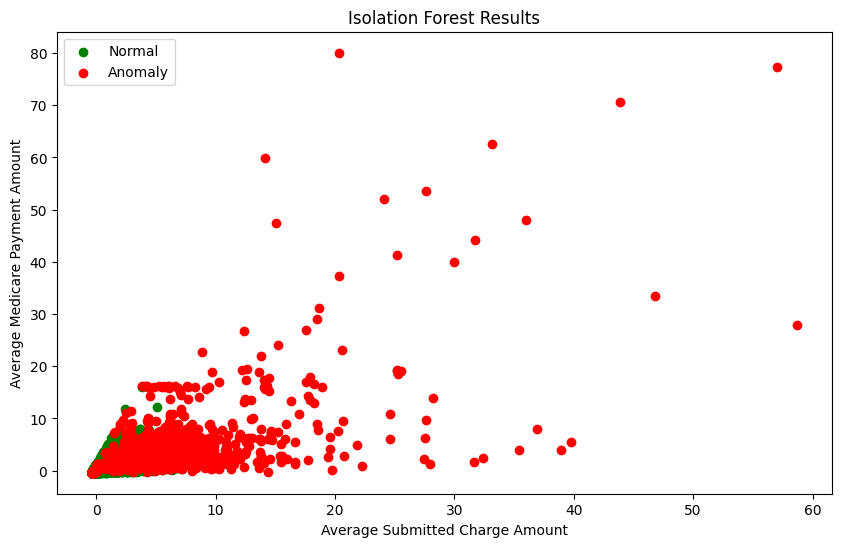

In [366]:
X_transformed = result

plt.figure(figsize=(10, 6))

plt.scatter(X_transformed[labels == 1][:, 0], X_transformed[labels == 1][:, 1], c='green', label='Normal')

plt.scatter(X_transformed[labels == -1][:, 0], X_transformed[labels == -1][:, 1], c='red', label='Anomaly')

plt.legend()
plt.title('Isolation Forest Results')
plt.xlabel('Average Submitted Charge Amount')
plt.ylabel('Average Medicare Payment Amount')
plt.show()

The above graph represents the distribution of anomalies on the basis of Avergae Medicare Payment Amount and Average Submitted Charge Amount columns

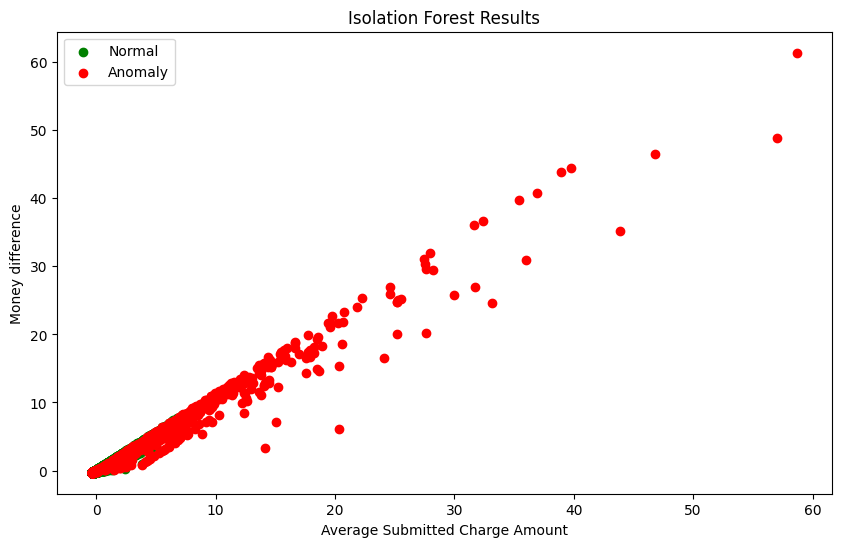

In [367]:
result = df.iloc[:, [4, 6]].to_numpy()

X_transformed = result

plt.figure(figsize=(10, 6))

plt.scatter(X_transformed[labels == 1][:, 0], X_transformed[labels == 1][:, 1], c='green', label='Normal')

plt.scatter(X_transformed[labels == -1][:, 0], X_transformed[labels == -1][:, 1], c='red', label='Anomaly')

plt.legend()
plt.title('Isolation Forest Results')
plt.xlabel('Average Submitted Charge Amount')
plt.ylabel('Money difference')
plt.show()

The above graph represents the distribution of anomalies on the basis of Money difference and Average Submitted Charge Amount columns

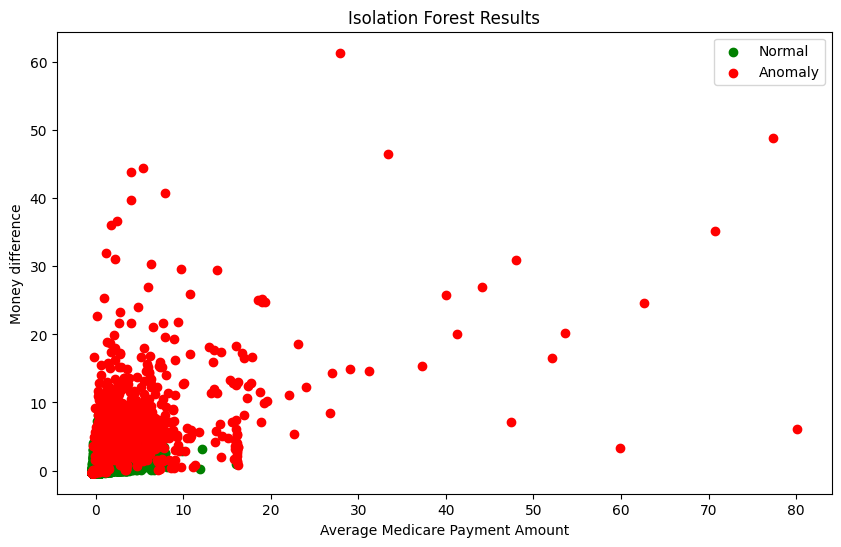

In [368]:
result = df.iloc[:, [5, 6]].to_numpy()

X_transformed = result

plt.figure(figsize=(10, 6))

plt.scatter(X_transformed[labels == 1][:, 0], X_transformed[labels == 1][:, 1], c='green', label='Normal')

plt.scatter(X_transformed[labels == -1][:, 0], X_transformed[labels == -1][:, 1], c='red', label='Anomaly')

plt.legend()
plt.title('Isolation Forest Results')
plt.xlabel('Average Medicare Payment Amount')
plt.ylabel('Money difference')
plt.show()

The above graph represents the distribution of anomalies on the basis of Money difference and Average Medicare Payment Amount columns

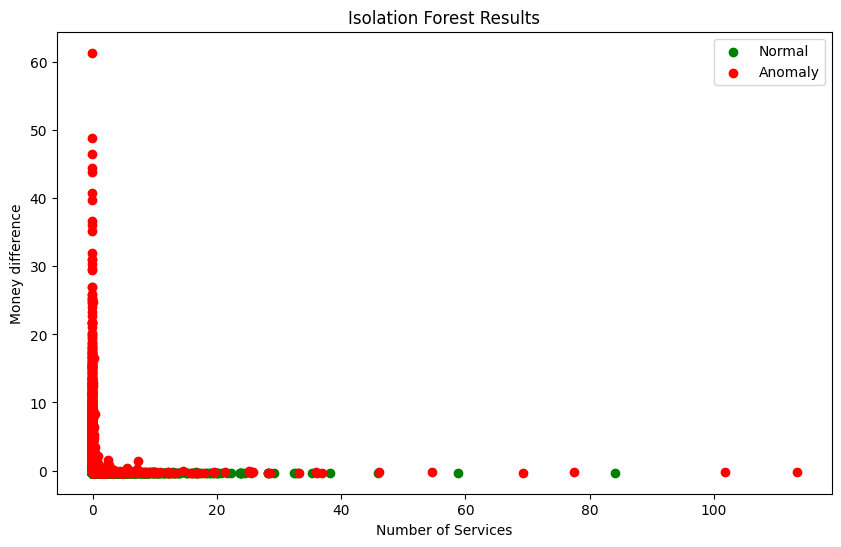

In [369]:
result = df.iloc[:, [1, 6]].to_numpy()

X_transformed = result

plt.figure(figsize=(10, 6))

plt.scatter(X_transformed[labels == 1][:, 0], X_transformed[labels == 1][:, 1], c='green', label='Normal')

plt.scatter(X_transformed[labels == -1][:, 0], X_transformed[labels == -1][:, 1], c='red', label='Anomaly')

plt.legend()
plt.title('Isolation Forest Results')
plt.xlabel('Number of Services')
plt.ylabel('Money difference')
plt.show()

The above graph represents the distribution of anomalies on the basis of Money difference and Number of Services columns

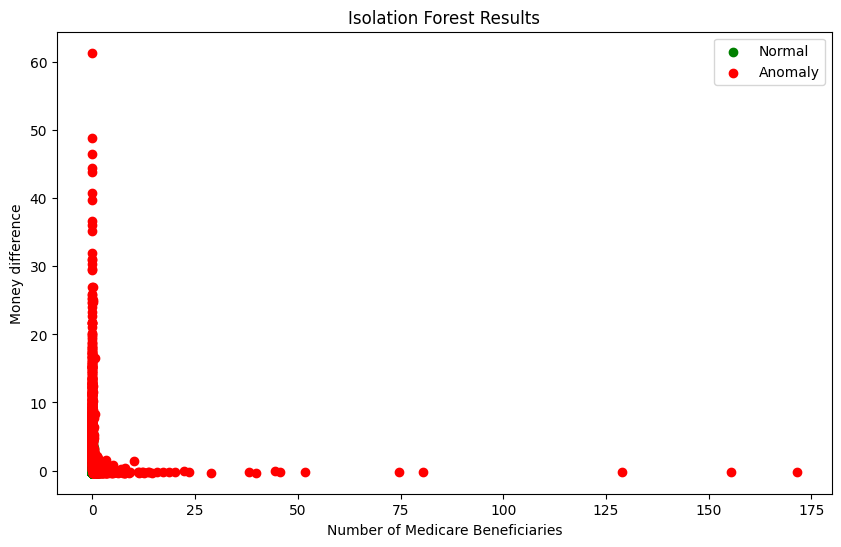

In [370]:
result = df.iloc[:, [2, 6]].to_numpy()

X_transformed = result

plt.figure(figsize=(10, 6))

plt.scatter(X_transformed[labels == 1][:, 0], X_transformed[labels == 1][:, 1], c='green', label='Normal')

plt.scatter(X_transformed[labels == -1][:, 0], X_transformed[labels == -1][:, 1], c='red', label='Anomaly')

plt.legend()
plt.title('Isolation Forest Results')
plt.xlabel('Number of Medicare Beneficiaries')
plt.ylabel('Money difference')
plt.show()

The above graph represents the distribution of anomalies on the basis of Money difference and Number of Medicare Beneficiaries columns

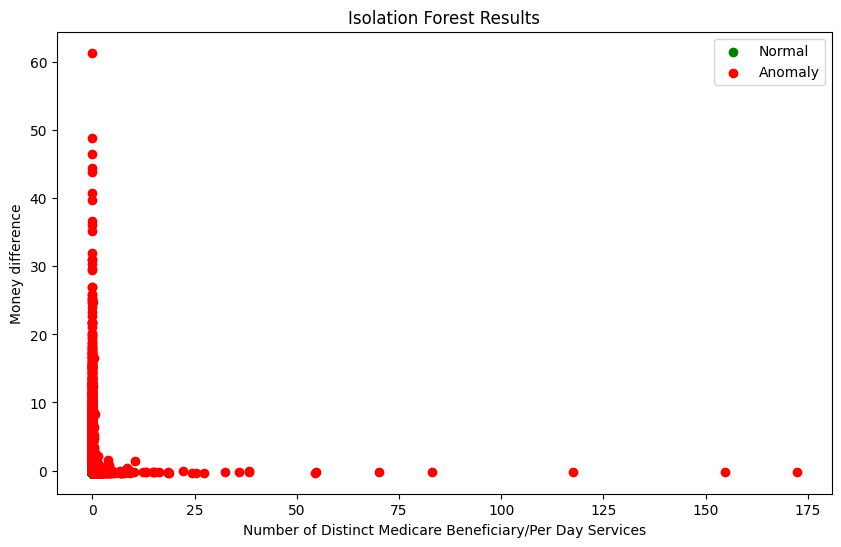

In [371]:
result = df.iloc[:, [3, 6]].to_numpy()

X_transformed = result

plt.figure(figsize=(10, 6))

plt.scatter(X_transformed[labels == 1][:, 0], X_transformed[labels == 1][:, 1], c='green', label='Normal')

plt.scatter(X_transformed[labels == -1][:, 0], X_transformed[labels == -1][:, 1], c='red', label='Anomaly')

plt.legend()
plt.title('Isolation Forest Results')
plt.xlabel('Number of Distinct Medicare Beneficiary/Per Day Services')
plt.ylabel('Money difference')
plt.show()

The above graph represents the distribution of anomalies on the basis of Money difference and Number of Medicare Benficiary/Per Day Services columns

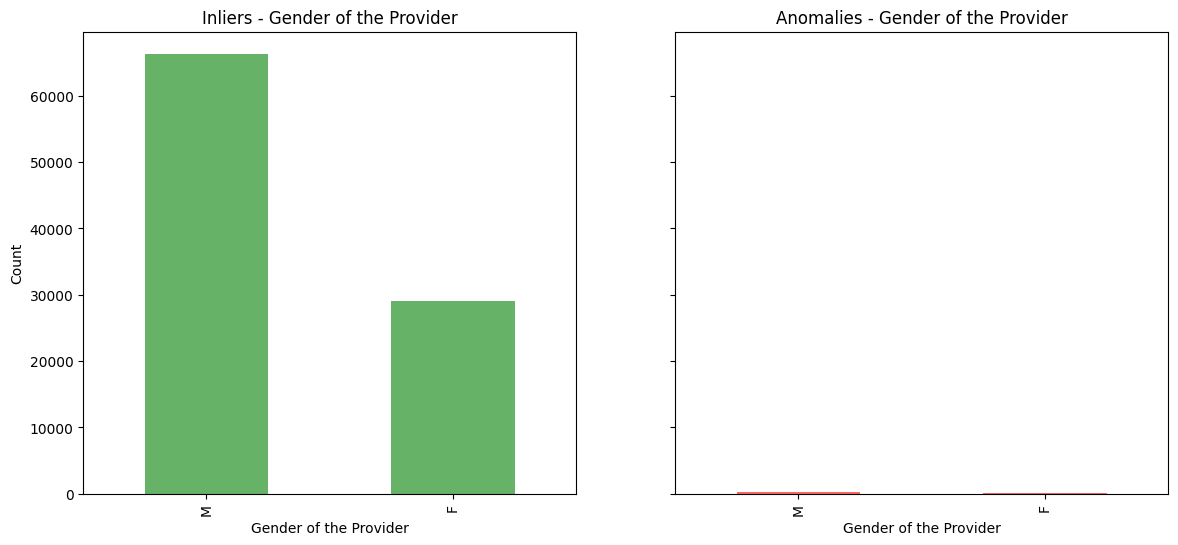

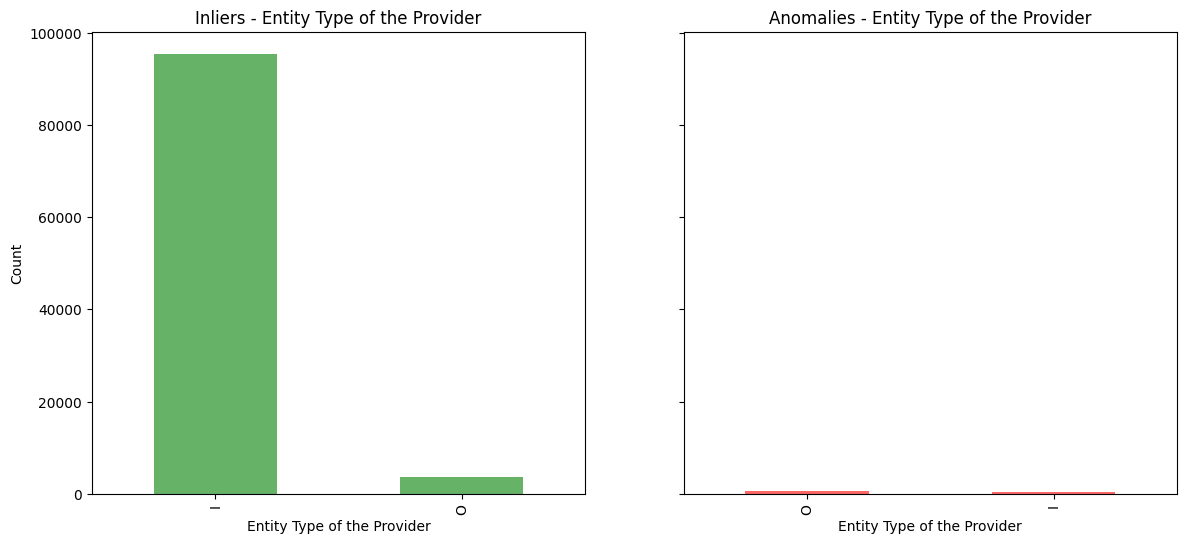

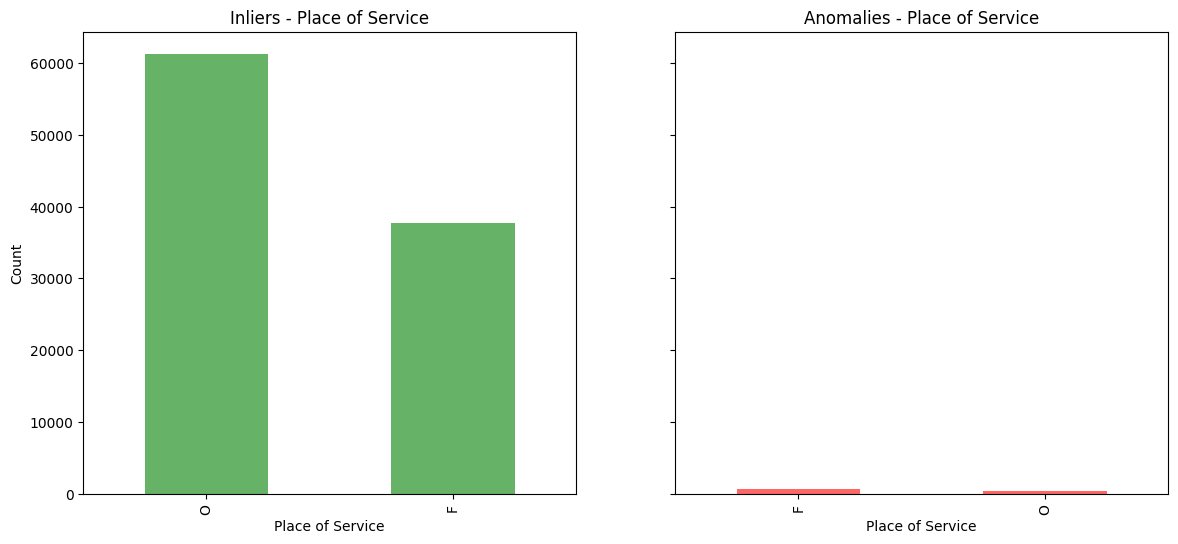

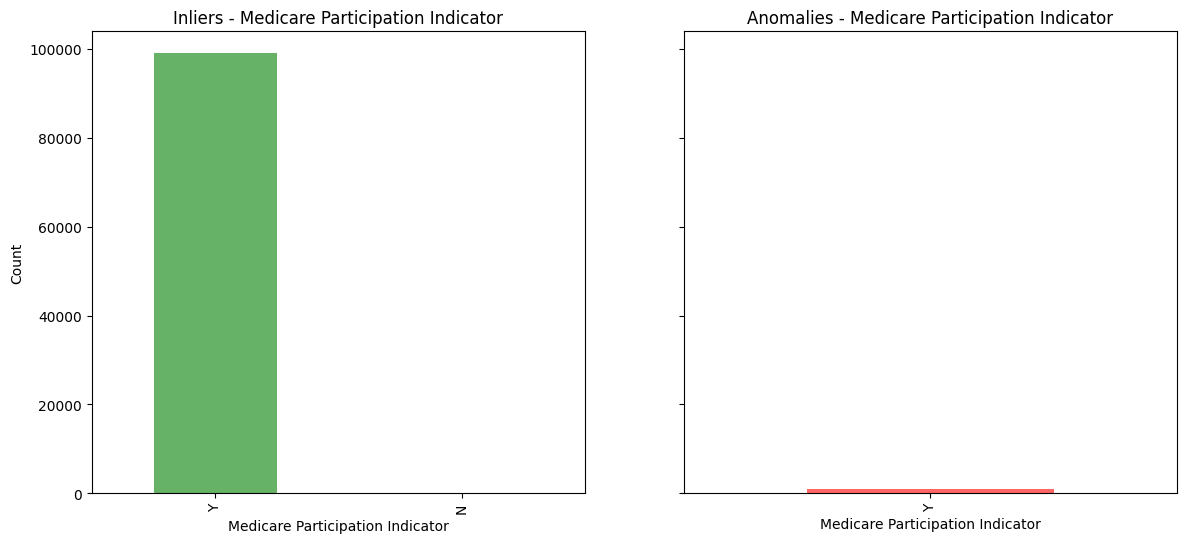

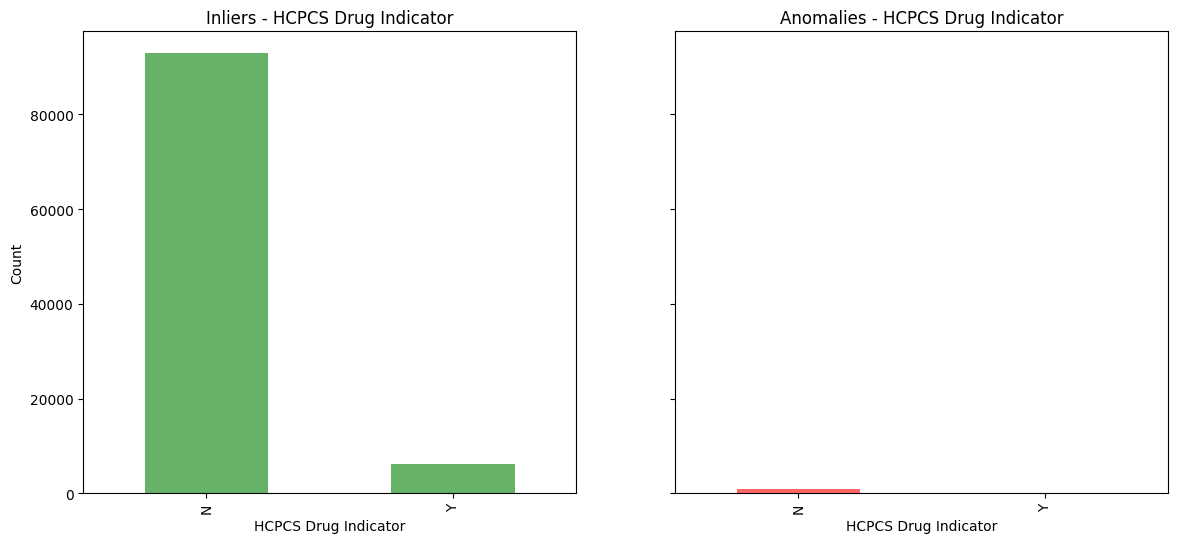

In [372]:
inliers = df_org[df_org['Anomaly'] == 1]
anomalies = df_org[df_org['Anomaly'] == -1]

# Function to plot categorical feature distributions
def plot_categorical_feature(df_org, feature):
    fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    # Plot for inliers
    inliers[feature].value_counts().plot(kind='bar', ax=ax[0], color='green', alpha=0.6)
    ax[0].set_title(f'Inliers - {feature}')
    ax[0].set_ylabel('Count')

    # Plot for anomalies
    anomalies[feature].value_counts().plot(kind='bar', ax=ax[1], color='red', alpha=0.6)
    ax[1].set_title(f'Anomalies - {feature}')

    plt.show()

# Plot the categorical features
plot_categorical_feature(df_org, 'Gender of the Provider')
plot_categorical_feature(df_org, 'Entity Type of the Provider')
plot_categorical_feature(df_org, 'Place of Service')
plot_categorical_feature(df_org, 'Medicare Participation Indicator')
plot_categorical_feature(df_org, 'HCPCS Drug Indicator')


The above bar graphs shows us the distribution of anomalies in the categorical columns

### **Using Elliptic Envelope to fit on the dataset and predicting anomalies**

In [373]:
from sklearn.covariance import EllipticEnvelope

In [374]:
elliptic_env = EllipticEnvelope(contamination=0.0127, random_state=42)

elliptic_env.fit(X)

labels = elliptic_env.predict(X)

scores = elliptic_env.decision_function(X)

/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:745: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


In [375]:
df_org['Anomaly'] = labels

In [376]:
list(labels).count(-1)

1270

In [377]:
list(labels).count(1)

98730

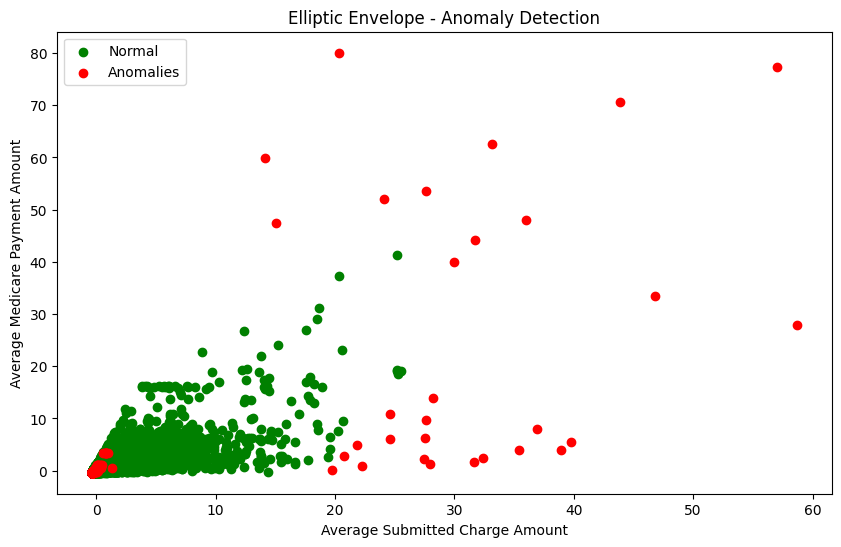

In [378]:
result = df.iloc[:, [4, 5]].to_numpy()

X_transformed = result

plt.figure(figsize=(10, 6))

# Plot inliers
plt.scatter(X_transformed[labels == 1][:, 0], X_transformed[labels == 1][:, 1], c='green', label='Normal')

# Plot anomalies
plt.scatter(X_transformed[labels == -1][:, 0], X_transformed[labels == -1][:, 1], c='red', label='Anomalies')

plt.legend()
plt.title('Elliptic Envelope - Anomaly Detection')
plt.xlabel('Average Submitted Charge Amount')
plt.ylabel('Average Medicare Payment Amount')
plt.show()

The above graph represents the distribution of anomalies on the basis of Avergae Medicare Payment Amount and Average Submitted Charge Amount columns

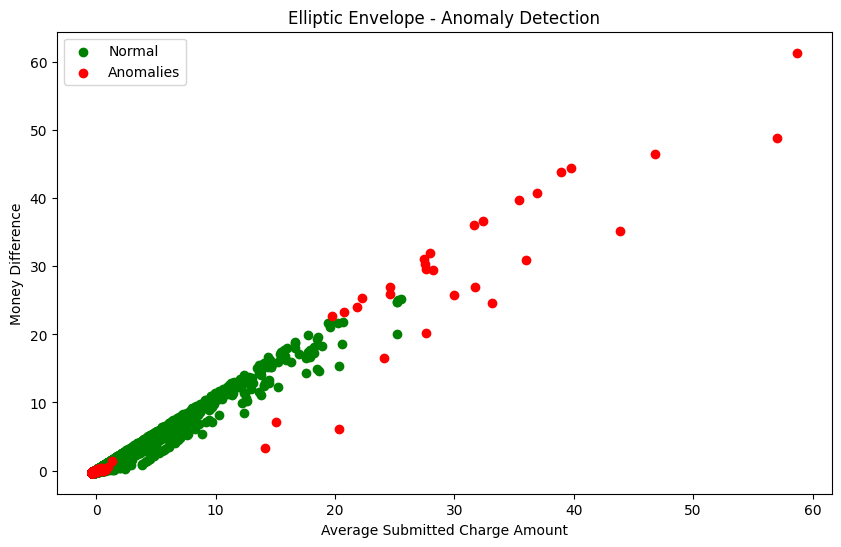

In [379]:
result = df.iloc[:, [4, 6]].to_numpy()

X_transformed = result

plt.figure(figsize=(10, 6))

# Plot inliers
plt.scatter(X_transformed[labels == 1][:, 0], X_transformed[labels == 1][:, 1], c='green', label='Normal')

# Plot anomalies
plt.scatter(X_transformed[labels == -1][:, 0], X_transformed[labels == -1][:, 1], c='red', label='Anomalies')

plt.legend()
plt.title('Elliptic Envelope - Anomaly Detection')
plt.xlabel('Average Submitted Charge Amount')
plt.ylabel('Money Difference')
plt.show()

The above graph represents the distribution of anomalies on the basis of Money difference and Average Submitted Charge Amount columns



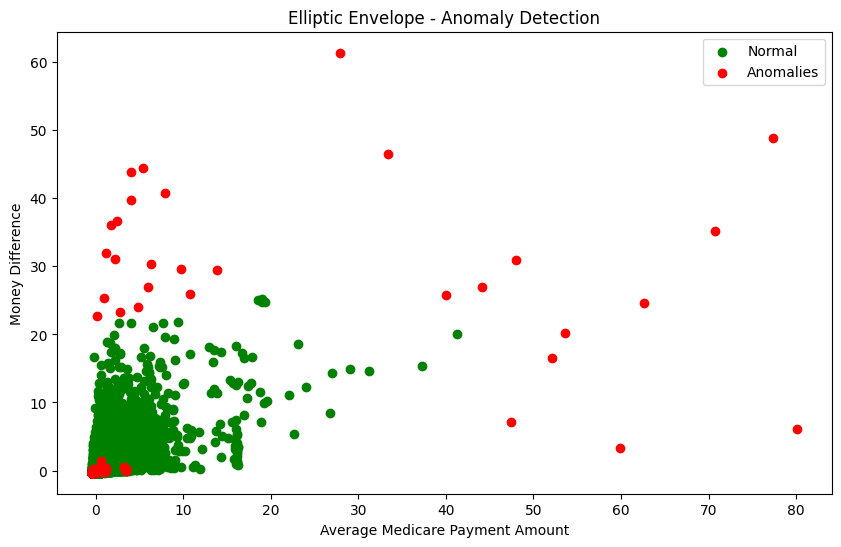

In [380]:
result = df.iloc[:, [5, 6]].to_numpy()

X_transformed = result

plt.figure(figsize=(10, 6))

# Plot inliers
plt.scatter(X_transformed[labels == 1][:, 0], X_transformed[labels == 1][:, 1], c='green', label='Normal')

# Plot anomalies
plt.scatter(X_transformed[labels == -1][:, 0], X_transformed[labels == -1][:, 1], c='red', label='Anomalies')

plt.legend()
plt.title('Elliptic Envelope - Anomaly Detection')
plt.xlabel('Average Medicare Payment Amount')
plt.ylabel('Money Difference')
plt.show()

The above graph represents the distribution of anomalies on the basis of Money difference and Average Medicare Payment Amount columns

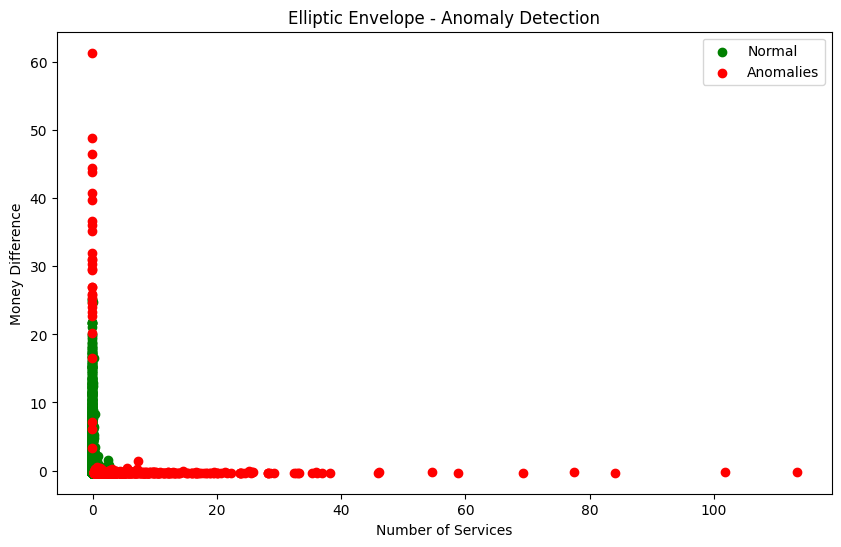

In [381]:
result = df.iloc[:, [1, 6]].to_numpy()

X_transformed = result

plt.figure(figsize=(10, 6))

# Plot inliers
plt.scatter(X_transformed[labels == 1][:, 0], X_transformed[labels == 1][:, 1], c='green', label='Normal')

# Plot anomalies
plt.scatter(X_transformed[labels == -1][:, 0], X_transformed[labels == -1][:, 1], c='red', label='Anomalies')


plt.legend()
plt.title('Elliptic Envelope - Anomaly Detection')
plt.xlabel('Number of Services')
plt.ylabel('Money Difference')
plt.show()

The above graph represents the distribution of anomalies on the basis of Money difference and Number of Services columns

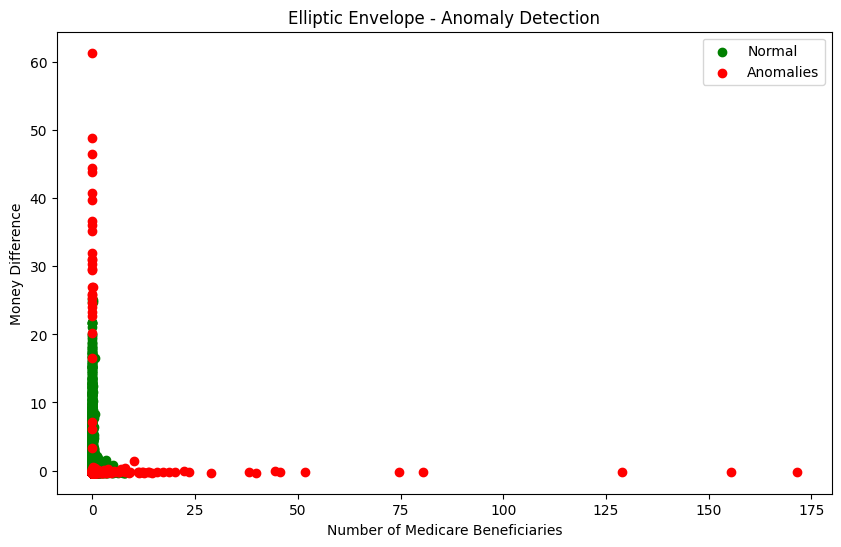

In [382]:
result = df.iloc[:, [2, 6]].to_numpy()

X_transformed = result

plt.figure(figsize=(10, 6))

# Plot inliers
plt.scatter(X_transformed[labels == 1][:, 0], X_transformed[labels == 1][:, 1], c='green', label='Normal')

# Plot anomalies
plt.scatter(X_transformed[labels == -1][:, 0], X_transformed[labels == -1][:, 1], c='red', label='Anomalies')

plt.legend()
plt.title('Elliptic Envelope - Anomaly Detection')
plt.xlabel('Number of Medicare Beneficiaries')
plt.ylabel('Money Difference')
plt.show()

The above graph represents the distribution of anomalies on the basis of Money difference and Number of Medicare Benficiary columns

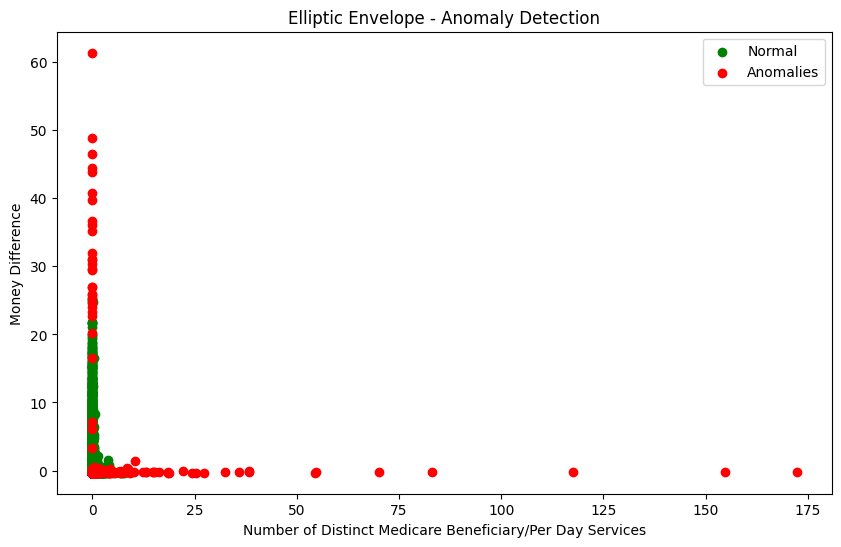

In [383]:
result = df.iloc[:, [3, 6]].to_numpy()

X_transformed = result

plt.figure(figsize=(10, 6))

# Plot inliers
plt.scatter(X_transformed[labels == 1][:, 0], X_transformed[labels == 1][:, 1], c='green', label='Normal')

# Plot anomalies
plt.scatter(X_transformed[labels == -1][:, 0], X_transformed[labels == -1][:, 1], c='red', label='Anomalies')

plt.legend()
plt.title('Elliptic Envelope - Anomaly Detection')
plt.xlabel('Number of Distinct Medicare Beneficiary/Per Day Services')
plt.ylabel('Money Difference')
plt.show()

The above graph represents the distribution of anomalies on the basis of Money difference and Number of Medicare Benficiary/Per Day Services columns

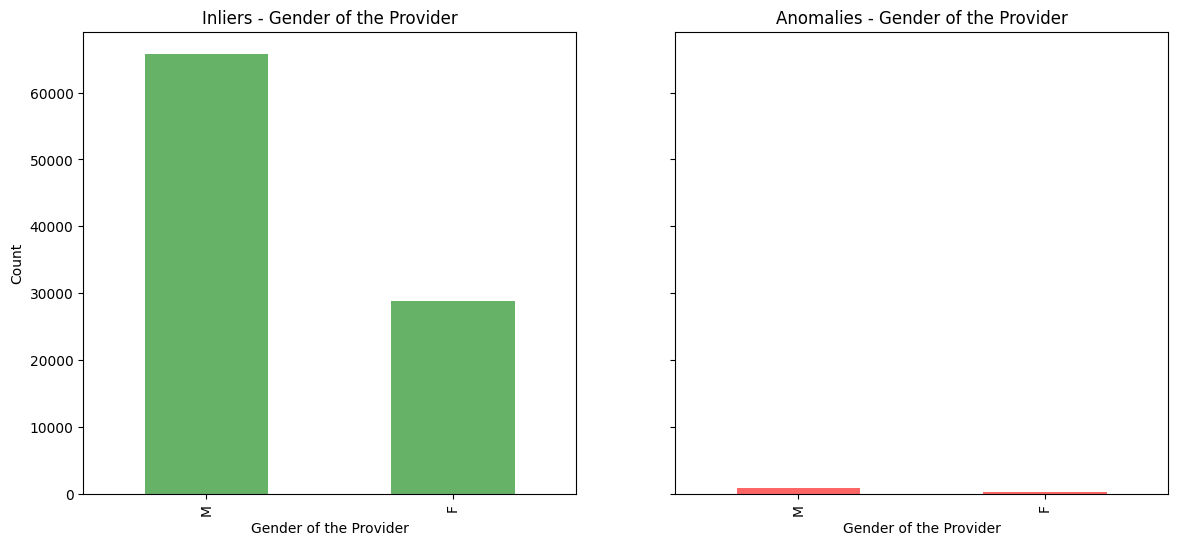

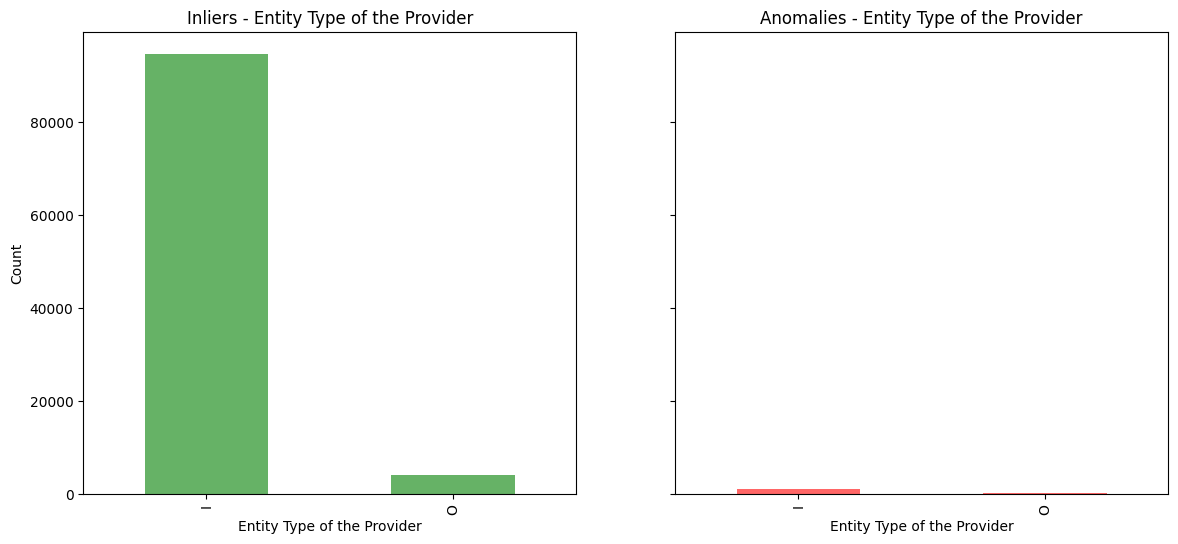

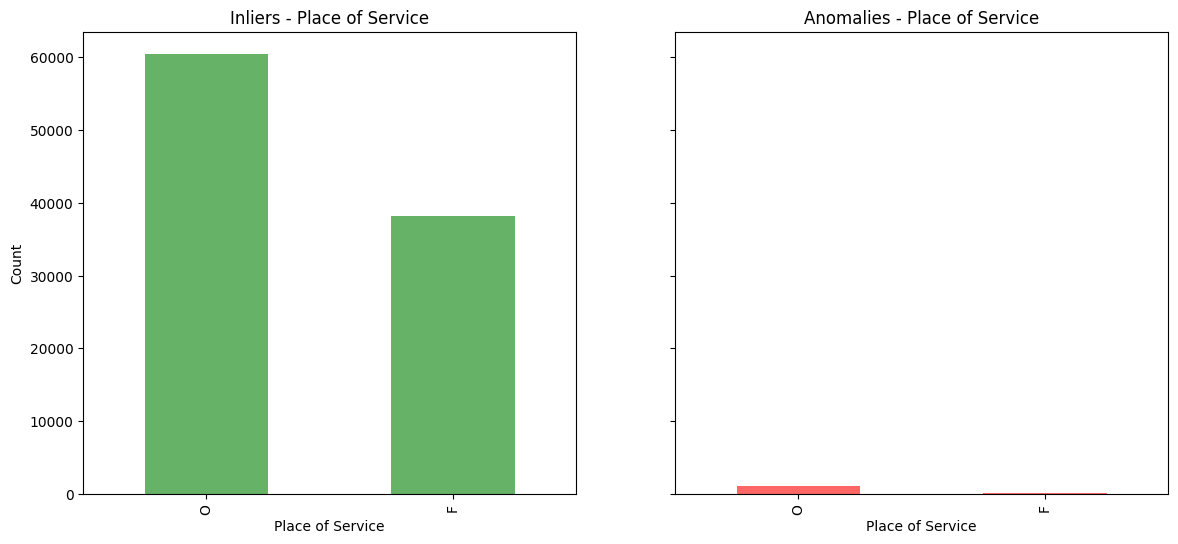

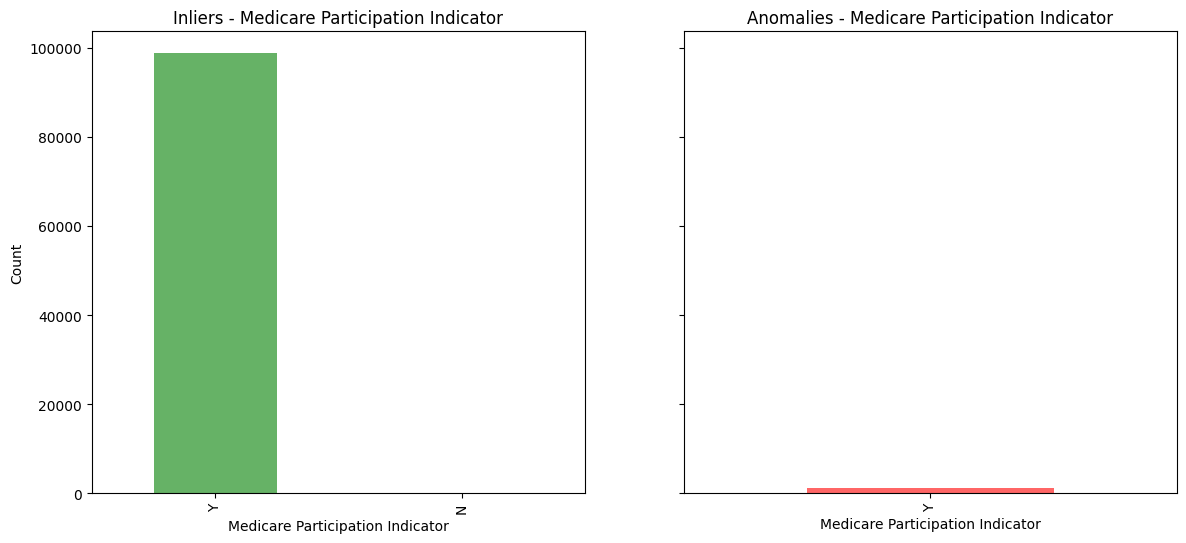

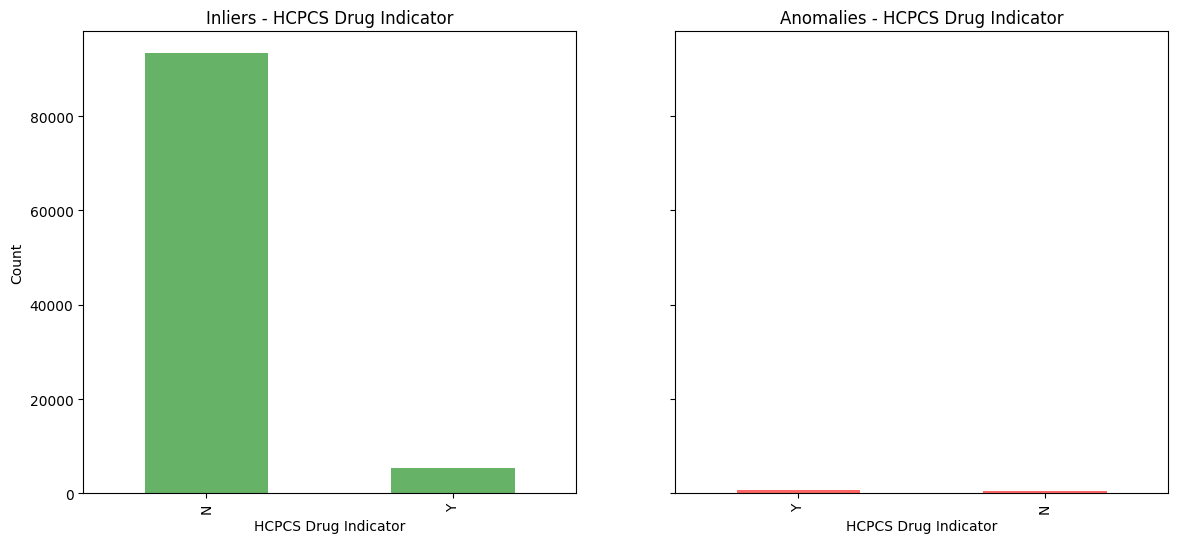

In [384]:
inliers = df_org[df_org['Anomaly'] == 1]
anomalies = df_org[df_org['Anomaly'] == -1]

# Function to plot categorical feature distributions
def plot_categorical_feature(df_org, feature):
    fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    # Plot for inliers
    inliers[feature].value_counts().plot(kind='bar', ax=ax[0], color='green', alpha=0.6)
    ax[0].set_title(f'Inliers - {feature}')
    ax[0].set_ylabel('Count')

    # Plot for anomalies
    anomalies[feature].value_counts().plot(kind='bar', ax=ax[1], color='red', alpha=0.6)
    ax[1].set_title(f'Anomalies - {feature}')

    plt.show()

# Plot the categorical features
plot_categorical_feature(df_org, 'Gender of the Provider')
plot_categorical_feature(df_org, 'Entity Type of the Provider')
plot_categorical_feature(df_org, 'Place of Service')
plot_categorical_feature(df_org, 'Medicare Participation Indicator')
plot_categorical_feature(df_org, 'HCPCS Drug Indicator')


The above bar graphs shows us the distribution of anomalies in the categorical columns

In [385]:
df.drop(columns=['Number of Distinct Medicare Beneficiary/Per Day Services','Number of Medicare Beneficiaries','Number of Services'], inplace=True)

### **Using One Class SVM to fit on the dataset and predicting anomalies**

In [386]:
ocsvm = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.01)

In [387]:
ocsvm.fit(X)

OneClassSVM(gamma=0.1, nu=0.01)

In [388]:
labels = ocsvm.predict(X)

scores = ocsvm.decision_function(X)

In [389]:
df_org['Anomaly'] = labels

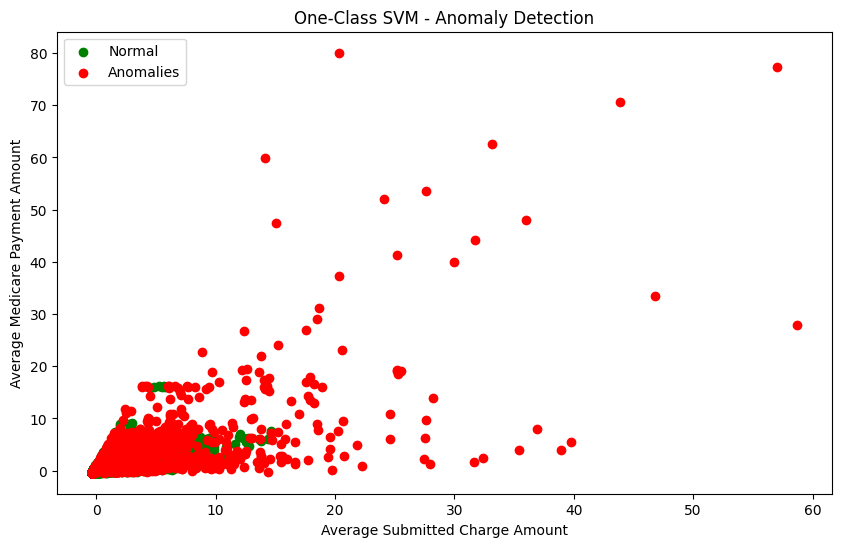

In [390]:
result = df.iloc[:, [1, 2]].to_numpy()

X_transformed = result

plt.figure(figsize=(10, 6))

# Plot inliers
plt.scatter(X_transformed[labels == 1][:, 0], X_transformed[labels == 1][:, 1], c='green', label='Normal')

# Plot anomalies
plt.scatter(X_transformed[labels == -1][:, 0], X_transformed[labels == -1][:, 1], c='red', label='Anomalies')

plt.legend()
plt.title('One-Class SVM - Anomaly Detection')
plt.xlabel('Average Submitted Charge Amount')
plt.ylabel('Average Medicare Payment Amount')
plt.show()

The above graph represents the distribution of anomalies on the basis of Average Medicare Payment Amount and Average Submitted Charge Amount columns

In [391]:
list(labels).count(-1)

1050

In [392]:
list(labels).count(1)

98950

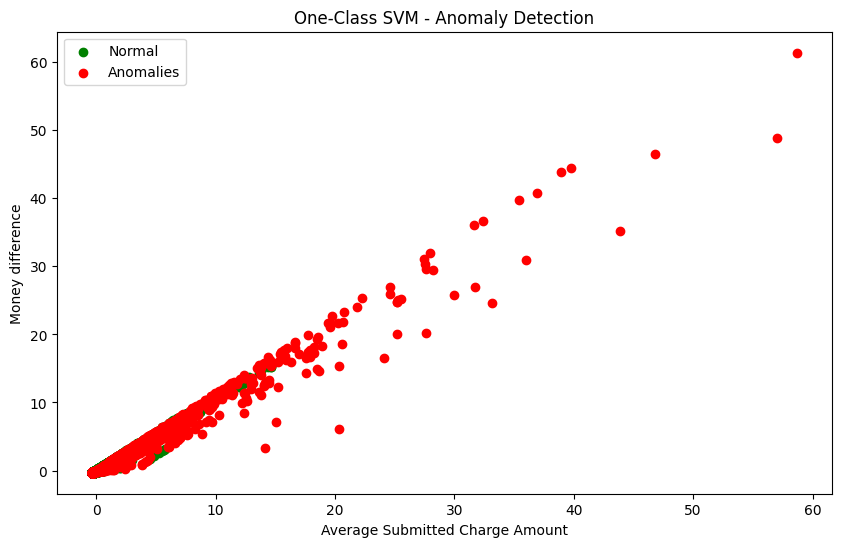

In [393]:
result = df.iloc[:, [1, 3]].to_numpy()

X_transformed = result

plt.figure(figsize=(10, 6))

# Plot inliers
plt.scatter(X_transformed[labels == 1][:, 0], X_transformed[labels == 1][:, 1], c='green', label='Normal')

# Plot anomalies
plt.scatter(X_transformed[labels == -1][:, 0], X_transformed[labels == -1][:, 1], c='red', label='Anomalies')

plt.legend()
plt.title('One-Class SVM - Anomaly Detection')
plt.xlabel('Average Submitted Charge Amount')
plt.ylabel('Money difference')
plt.show()

The above graph represents the distribution of anomalies on the basis of Money difference and Average Submitted Charge Amount columns

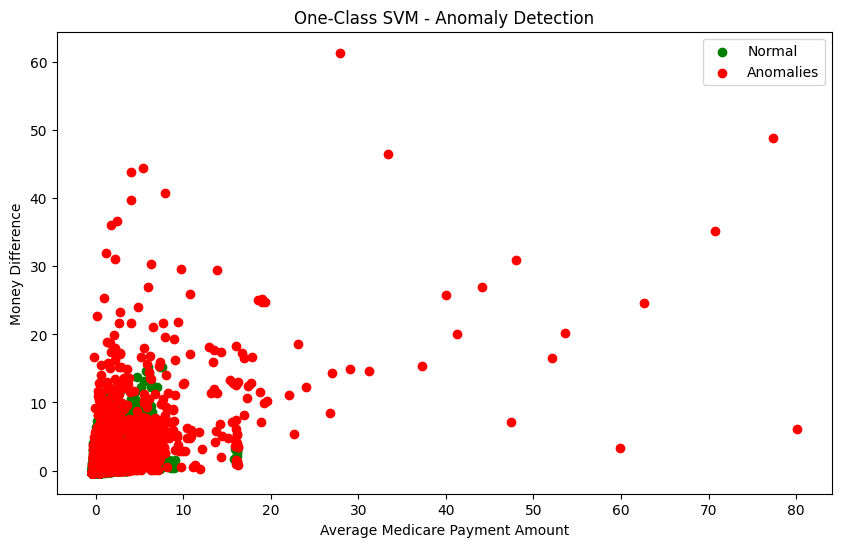

In [394]:
result = df.iloc[:, [2, 3]].to_numpy()

X_transformed = result

plt.figure(figsize=(10, 6))

# Plot inliers
plt.scatter(X_transformed[labels == 1][:, 0], X_transformed[labels == 1][:, 1], c='green', label='Normal')

# Plot anomalies
plt.scatter(X_transformed[labels == -1][:, 0], X_transformed[labels == -1][:, 1], c='red', label='Anomalies')

plt.legend()
plt.title('One-Class SVM - Anomaly Detection')
plt.xlabel('Average Medicare Payment Amount')
plt.ylabel('Money Difference')
plt.show()

The above graph represents the distribution of anomalies on the basis of Money difference and Average Medicare Payment Amount columns

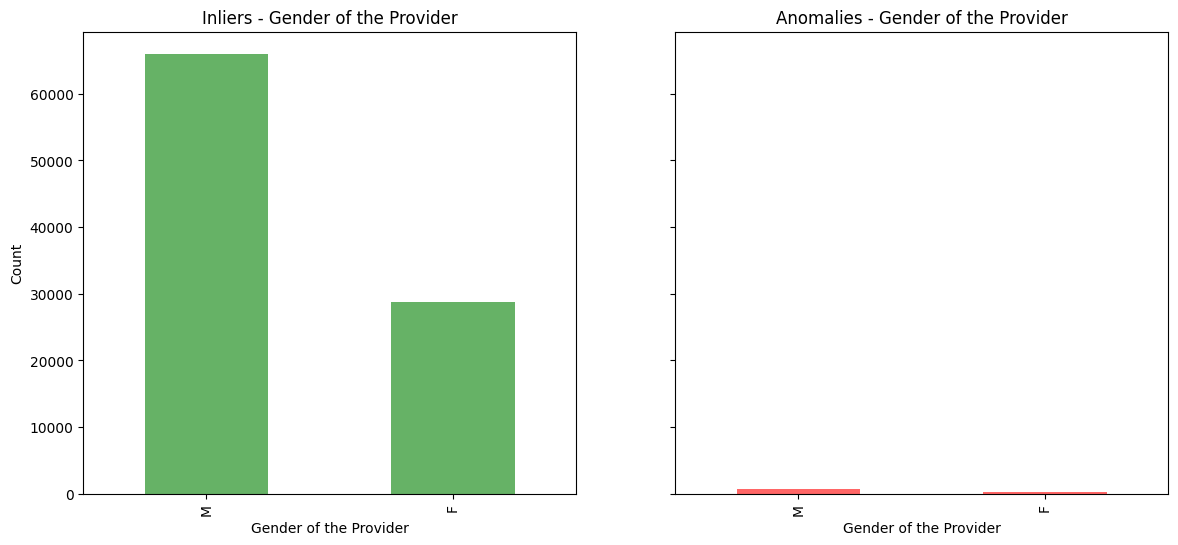

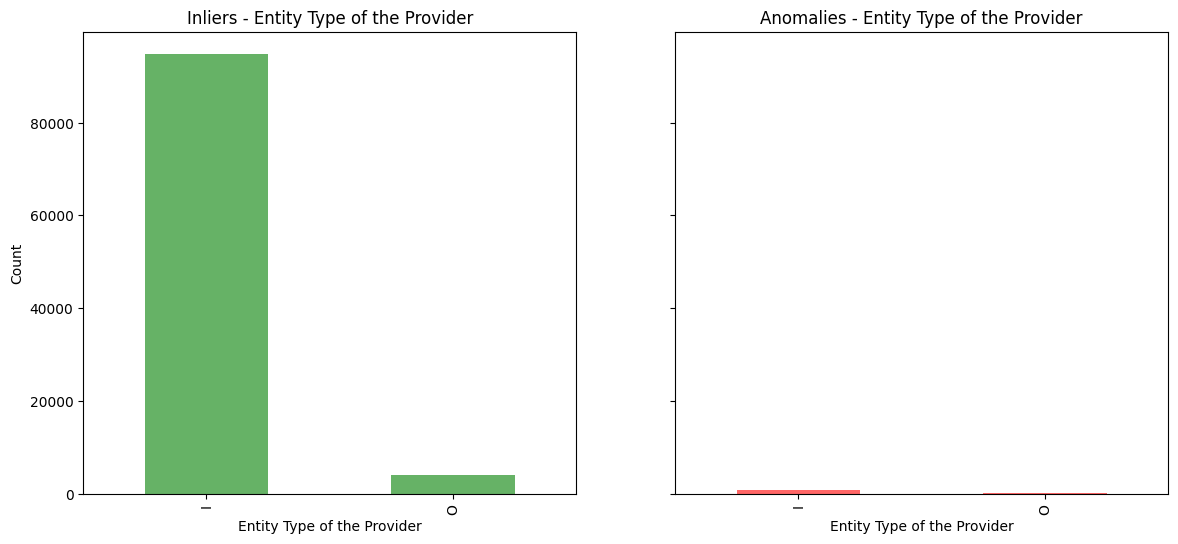

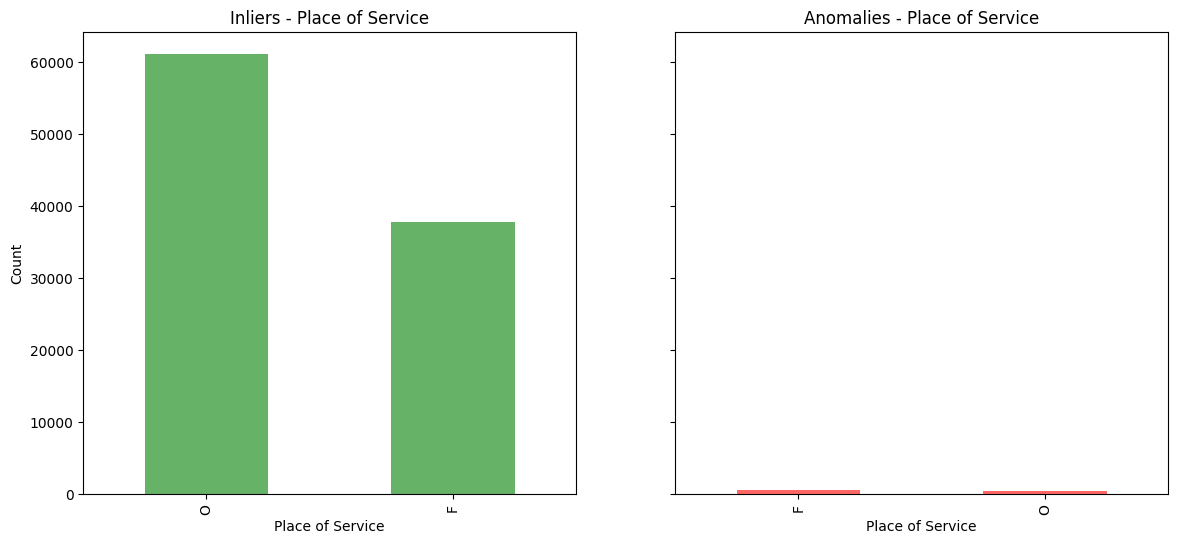

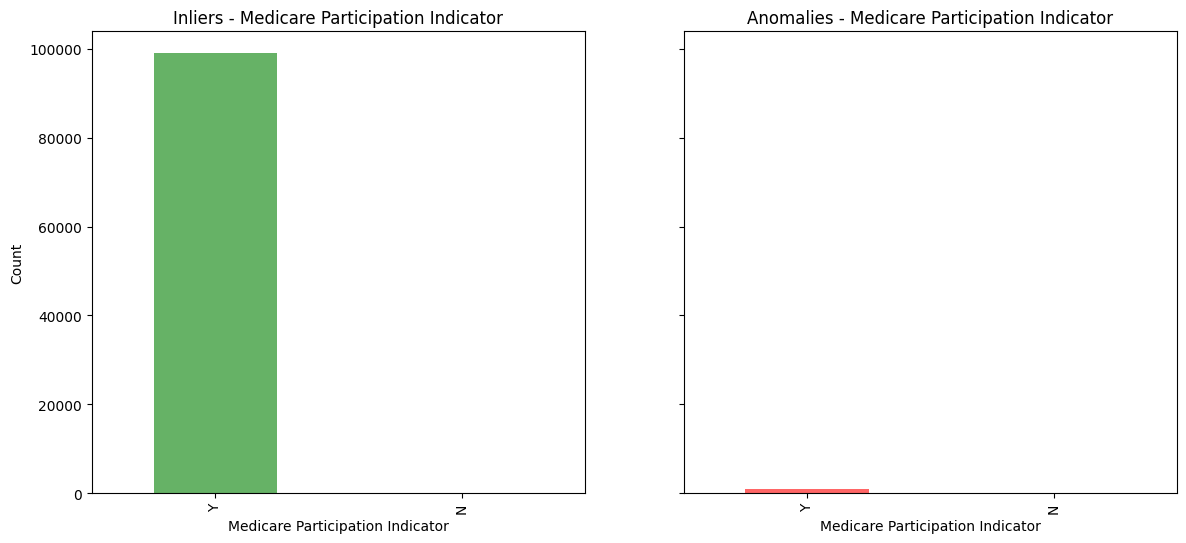

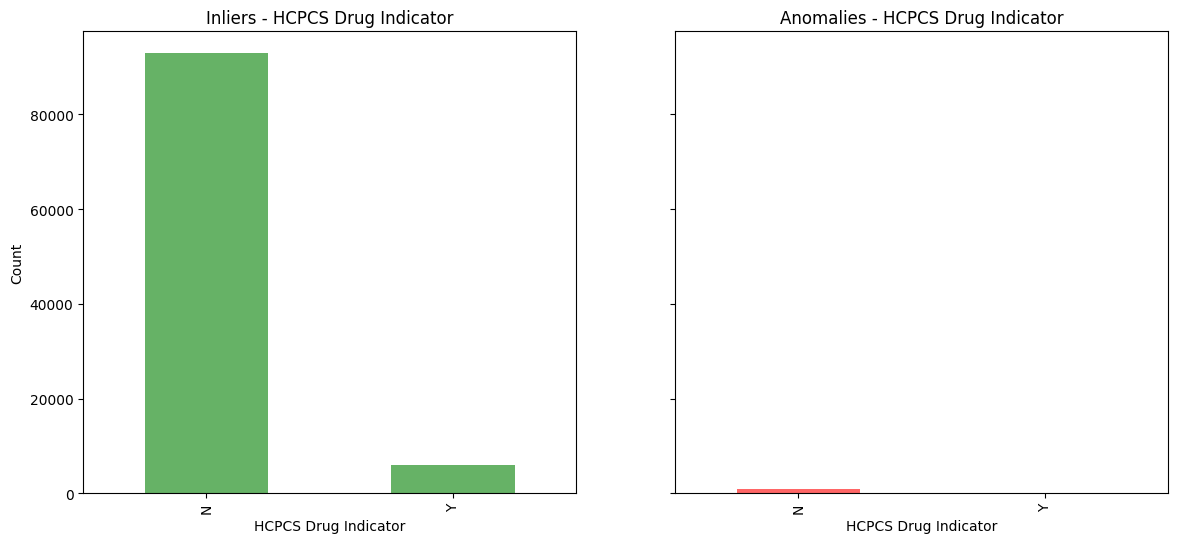

In [395]:
inliers = df_org[df_org['Anomaly'] == 1]
anomalies = df_org[df_org['Anomaly'] == -1]

# Function to plot categorical feature distributions
def plot_categorical_feature(df_org, feature):
    fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    # Plot for inliers
    inliers[feature].value_counts().plot(kind='bar', ax=ax[0], color='green', alpha=0.6)
    ax[0].set_title(f'Inliers - {feature}')
    ax[0].set_ylabel('Count')

    # Plot for anomalies
    anomalies[feature].value_counts().plot(kind='bar', ax=ax[1], color='red', alpha=0.6)
    ax[1].set_title(f'Anomalies - {feature}')

    plt.show()

# Plot the categorical features
plot_categorical_feature(df_org, 'Gender of the Provider')
plot_categorical_feature(df_org, 'Entity Type of the Provider')
plot_categorical_feature(df_org, 'Place of Service')
plot_categorical_feature(df_org, 'Medicare Participation Indicator')
plot_categorical_feature(df_org, 'HCPCS Drug Indicator')


The above bar graphs shows us the distribution of anomalies in the categorical columns

**In the above the code we implemented three anomaly detection models: Isolation Forest, Elliptic Envelope and One Class SVM. The three models were fit to the dataset and they were used to predict and mark anomalies in the dataset. The Isolation Forest model marked 1000 anomalies, the Elliptic Envelope marked 1270 anomalies and the One Class SVM marked 1050. All the results are really similar to each so we can assume that the number of anomalies lie in the 1000 to 1200 range. The plots are also useful in us visualizing the distribution of anomalies in the dataset. The bar plots are also used to visualize the distribution of anomalies in the categorical columns. We can also infer from the models that the number of anomalies is really less which is roughly about 1% of the total dataset.**